# Second Project: Classification

Team members:
- Harry Bhasin
- Oscar Padilla
- Najeeb Zaidi

In [95]:
%watermark -u -d -v -p numpy,pandas,matplotlib,sklearn

last updated: 2017-07-04 

CPython 2.7.12
IPython 5.1.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
sklearn 0.18.1


- [Load Data & Libraries](#1.-Load-Data-&-Libraries)
- [Data Preparation](#2.-Data-Preparation)

- [Task 1: Diagnosis Classification](#3.-Modeling-&-Evaluation)
    - [KNN](#3.1-KNN)
    - [Naive Bayes](#3.2-Naive-Bayes)
    - [Logistic Regression](#3.3-Logistic-Regression)
    
- [Task 2: Regression](#4.Task2)
    - [Linear Regression](#4.1-Linear-Regression)
    - [Kernel Regression](#4.2-NB)
    - [Regression Tree](#4.3-TBD)
    
- [Deployment](#5.-Deployment)

# Breast Cancer Wisconsin (Diagnostic) Data Set

We used the breast cancer data set from UCI machine learning repository. The results of the dataset predict diagnosis (attribute 2) if its benign (B) or malignant (M). The data set has 569 records and 32 attributes. It is a multivariate data set and all the attributes are in real number. The results also show the sets are linearly separable using all 30 input features.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The attributes describe characteristics of the cell nuclei present in the image.

#### Attribute Information:

1.  ID number
2.  Diagnosis (M = malignant, B = benign)

#### Ten real-valued features are computed for each cell nucleus:

1.  radius (mean of distances from center to points on the perimeter)
2.  texture (standard deviation of gray-scale values)
3.  perimeter
4.  area
5.  smoothness (local variation in radius lengths)
6.  compactness ($$perimeter^2 / area - 1.0$$)
7.  concavity (severity of concave portions of the contour)
8.  concave points (number of concave portions of the contour)
9.  symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits. There are no missing attribute values. The class distribution is 357 benign and 212 malignant.

## 1. Load Data & Libraries

In [69]:
import pandas as pd
import numpy as np
from __future__ import print_function

df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


[Back to Top](#Second-Project:-Classification)

## 2. Data Preparation

### 2.1 Variable Representation

In [70]:
# We found that the first column ID, creates noise and causes errors down the road. The very last column is empty (NaN)

if 'id' in df: 
    del df['id']
if 'Unnamed: 32' in df: 
    del df['Unnamed: 32']

In [71]:
# y Definition: Malignant = 1; Benign = 0

df['diagnosis'] = df.diagnosis == 'M'
df.diagnosis = df.diagnosis.astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [72]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.2 Collinearity

Data set and correlation between the variables after cleaning and formatting it

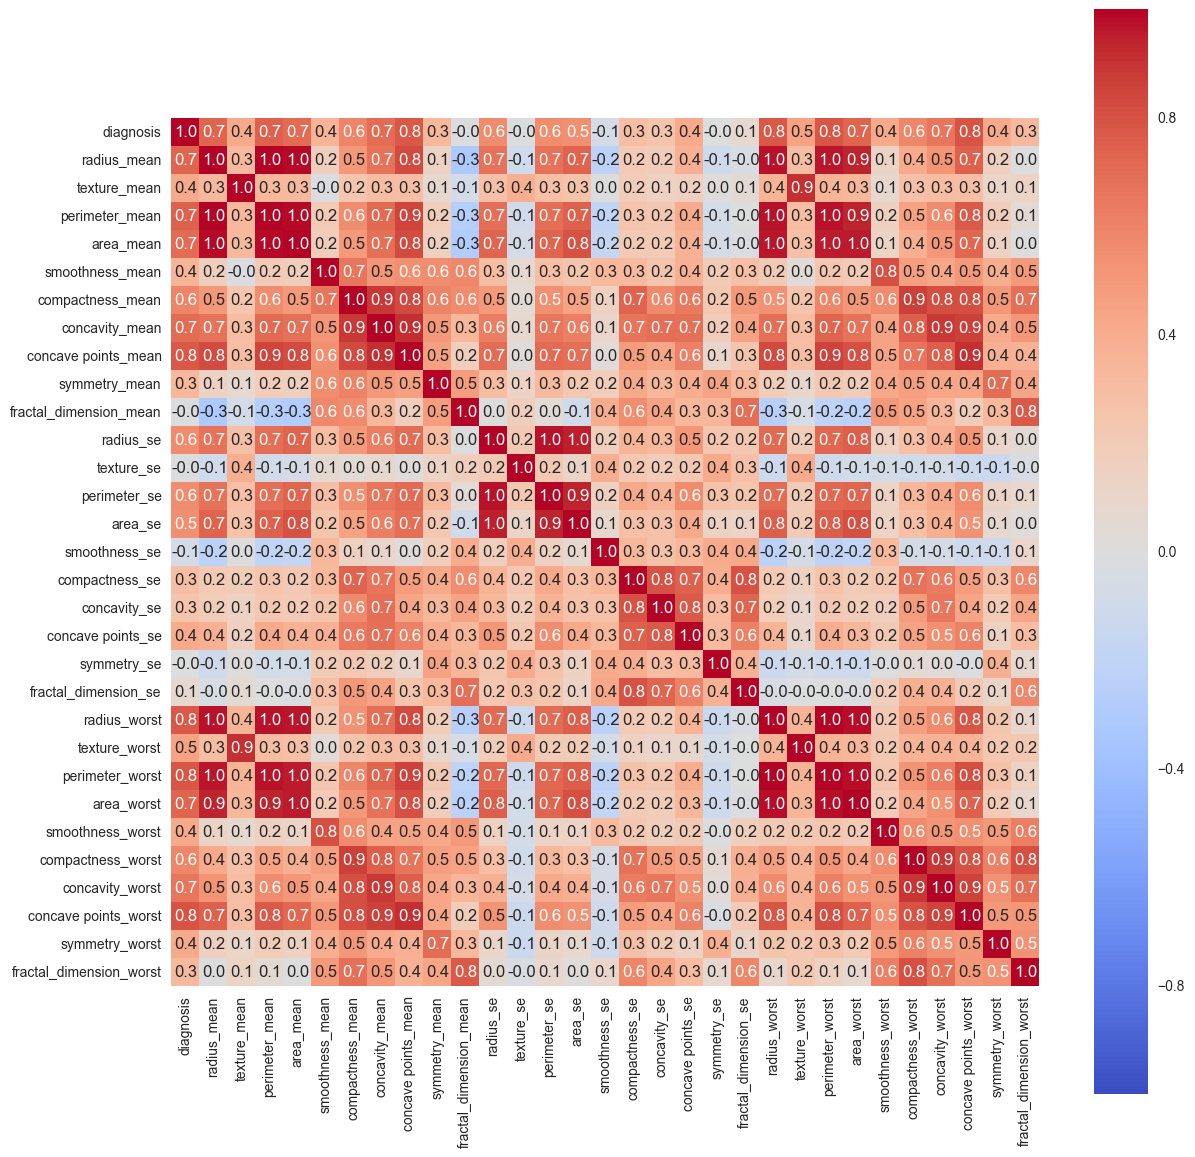

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

features_mean = list(df.columns[1:11])
features_se = list(df.columns[11:20])
features_worst =list(df.columns[21:31])

corr = df.corr() # .corr is used for find corelation
plt.figure(figsize=(14, 14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.1f',annot_kws={'size': 12},
           xticklabels= list(df.columns[0:31]), yticklabels= list(df.columns[0:31]),
           cmap= 'coolwarm')

Obviously the correlation between radius and dependent features (e.g. perimeter and area) is 1.0.
Similarly the correlation between the mean feature and the worst feature for certain dimensions (radius, perimeter and area) is > 0.9, as well.

### 2.3 Dimensionality Reduction

*Based on the Kaggle submission by Sara G. Mille*

https://www.kaggle.com/saramille/breast-cancer-prediction-knn-svc-and-logistic

$$y = f(X)$$

In [109]:
if 'diagnosis' in df:
    y = df['diagnosis'].values
    X = df.ix[:, df.columns != 'diagnosis'].values

#### PCA before Scaling & Standardization

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(X)
print (x_pca.shape)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 1)
[ 0.98204467]
0.982044671511


1 component explains 98.2% of the variance

#### Scaling & Standardization 

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### PCA after Scaling and Standardization

In [77]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_scaled)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 10)
[ 0.44272026  0.18971182  0.09393163  0.06602135  0.05495768  0.04024522
  0.02250734  0.01588724  0.01389649  0.01168978]
0.951568814337


10 components explain 95.2% of the variance

#### Removing High Collinearity Variables

Perimeter and area (mean, SE and worst) are removed due to high correlation (>0.9) to radius.

In [78]:
# * = to be removed
#0  radius_mean                569 non-null float64
#1  texture_mean               569 non-null float64
#2 *perimeter_mean             569 non-null float64
#3 *area_mean                  569 non-null float64
#4  smoothness_mean            569 non-null float64
#5  compactness_mean           569 non-null float64
#6  concavity_mean             569 non-null float64
#7  concave points_mean        569 non-null float64
#8  symmetry_mean              569 non-null float64
#9  fractal_dimension_mean     569 non-null float64
#10 radius_se                  569 non-null float64
#11 texture_se                 569 non-null float64
#12*perimeter_se               569 non-null float64
#13*area_se                    569 non-null float64
#14 smoothness_se              569 non-null float64
#15 compactness_se             569 non-null float64
#16 concavity_se               569 non-null float64
#17 concave points_se          569 non-null float64
#18 symmetry_se                569 non-null float64
#19 fractal_dimension_se       569 non-null float64
#20 radius_worst               569 non-null float64
#21 texture_worst              569 non-null float64
#22*perimeter_worst            569 non-null float64
#23*area_worst                 569 non-null float64
#24 smoothness_worst           569 non-null float64
#25 compactness_worst          569 non-null float64
#26 concavity_worst            569 non-null float64
#27 concave points_worst       569 non-null float64
#28 symmetry_worst             569 non-null float64
#29 fractal_dimension_worst    569 non-null float64

X_scaled = pd.DataFrame(X_scaled)
X_reduced = X_scaled.drop(X_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 

#### PCA after Removed Variables

In [79]:
pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(X_reduced)
print (x_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
loadings = pca.components_

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


11 components explain 96% of the variance

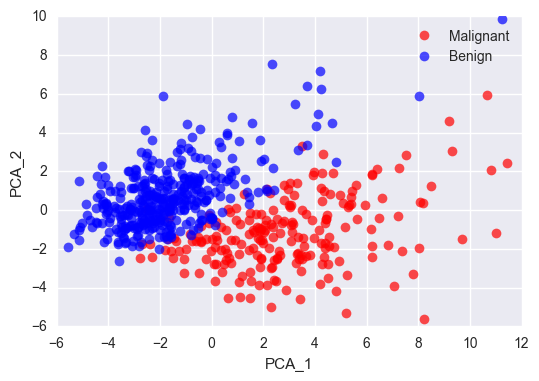

In [80]:
PCA_df = pd.DataFrame()
PCA_df['PCA_1'] = x_pca[:,0]
PCA_df['PCA_2'] = x_pca[:,1]


plt.plot(PCA_df['PCA_1'][df.diagnosis == 1],PCA_df['PCA_2'][df.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][df.diagnosis == 0],PCA_df['PCA_2'][df.diagnosis == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.legend(['Malignant','Benign'])

### 2.4 DESCRIPTION NEEDED! 

New dataset created standardized & scaled

In [81]:
X_reduced.head()

,0,1,4,5,6,7,8,9,10,11,...,18,19,20,21,24,25,26,27,28,29
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


[Back to Top](#Second-Project:-Classification)

## 3. Modeling & Evaluation

#### Splitting Training vs. Test

In [128]:
from sklearn.model_selection import train_test_split

X = X_reduced.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 1)

### 3.1 KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import metrics as mt

yhat = np.zeros(y.shape)

k_range = list(range(1, 20))
k_accuracy = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='recall')
    k_accuracy.append(score.mean())
print(np.round(k_accuracy,3))

[ 0.925  0.865  0.885  0.865  0.865  0.84   0.84   0.84   0.885  0.865
  0.865  0.865  0.865  0.84   0.865  0.865  0.865  0.865  0.865]


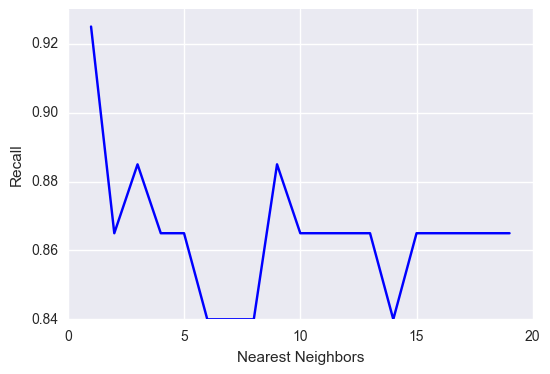

In [130]:
plt.plot(k_range, k_accuracy, color = "blue")
plt.xlabel('Nearest Neighbors')
plt.ylabel('Recall')
plt.show()

Highest recall when k = 3 nearest neighbors

#### Confusion Matrix

KNN:
 confusion matrix
 [[278  11]
 [ 19 148]] 


Confusion matrix plot of KNN classifier


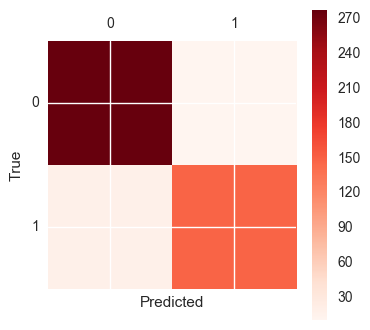


 Classification report 
              precision    recall  f1-score   support

          0       0.94      0.96      0.95       289
          1       0.93      0.89      0.91       167

avg / total       0.93      0.93      0.93       456



In [131]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

c_m = confusion_matrix(y_test, y_hat)

print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax = plt.matshow(c_m, cmap = plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# classification report
print('\n Classification report \n',classification_report(y_test, y_hat))

### 3.2 Naive Bayes

Accuracy of Gaussian Naive Bayes is: 0.916666666667
Naive Bayes:
 confusion matrix
 [[266  23]
 [ 15 152]] 


Confusion matrix plot of Naive Bayes classifier


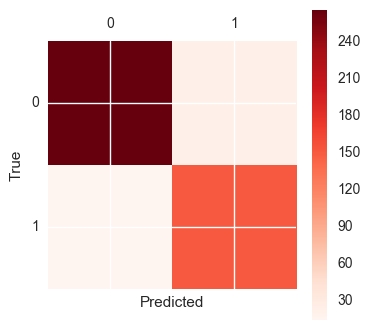


 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.92      0.93       289
          1       0.87      0.91      0.89       167

avg / total       0.92      0.92      0.92       456



In [132]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

print ('Accuracy of Gaussian Naive Bayes is:', accuracy_score(y_test,y_hat))

c_m = confusion_matrix(y_test, y_hat)

print('Naive Bayes:\n confusion matrix\n', c_m,'\n\n')
ax = plt.matshow(c_m, cmap = plt.cm.Reds)
print('Confusion matrix plot of Naive Bayes classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# classification report
print('\n Classification report \n',classification_report(y_test, y_hat))

### 3.3 Logistic Regression

#### Pipeline
*Source: Sebastian Raschka, Python Machine Learning*

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components = 11)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.961


#### K-fold cross-validation 

In [134]:
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits = 10, random_state = 1).split(X_train, y_train)

scores = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k + 1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold: 1, Class dist.: [61 40], Acc: 1.000
Fold: 2, Class dist.: [61 40], Acc: 0.917
Fold: 3, Class dist.: [61 40], Acc: 1.000
Fold: 4, Class dist.: [61 40], Acc: 0.917
Fold: 5, Class dist.: [61 40], Acc: 1.000
Fold: 6, Class dist.: [61 41], Acc: 1.000
Fold: 7, Class dist.: [61 41], Acc: 0.909
Fold: 8, Class dist.: [61 41], Acc: 1.000
Fold: 9, Class dist.: [62 41], Acc: 1.000
Fold: 10, Class dist.: [62 41], Acc: 1.000

CV accuracy: 0.974 +/- 0.039


In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_lr, X = X_train, y = y_train, cv = 10, n_jobs = 1)
print('CV accuracy scores: %s' % scores)

CV accuracy scores: [ 1.          0.91666667  1.          0.91666667  1.          1.
  0.90909091  1.          1.          1.        ]


In [123]:
kfold

<generator object split at 0x12c9160a0>